In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

# Análise dos dados de treino do Motor1

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #importando o seaborn
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
import plotly.express as px

In [3]:
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g

cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

In [4]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21"]

#Lê os dados, adiciona a coluna RUL e remove as colunas cycle, op1, op2 e op3
def load_data (clean=True):
    data = pd.read_csv("../input/nasa-cmaps/CMaps/train_FD001.txt", sep= "\s+", header = None,names=columns )
    data = data.groupby('id').apply(add_rul)
    if clean==True:
        data = data.drop(["cycle","op1","op2","op3"], axis=1)
    return data  

In [5]:
def corr_clean (data):
    for col in columns[5:]:
        if math.isnan(data.corr()['RUL'][col]):
            data = data.drop([col], axis=1)
    data = data.corr()
    return data

In [6]:
def norm_func(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return x_scaled

def new_data_func(train_data,norm=False):
    columns = train_data.columns
    new_data = train_data[["id",'RUL']]
    new_data.loc[:,'sensor']=[columns[1]]*train_data.shape[0]
#     print(train_data[columns[5]].values)
    if norm == True:
        new_data.loc[:, 'sensor_value'] = norm_func(train_data[columns[1]].values.reshape(-1, 1))
        
    else:
        new_data.loc[:,'sensor_value']= train_data[columns[1]]
        
#     print(np.min(new_data['sensor_value']),np.max(new_data['sensor_value']))
    
    
    
    for column in columns[1:-1]:
        temp_data = train_data[["id",'RUL']]
        temp_data.loc[:,'sensor']=[column]*train_data.shape[0];
        if norm == True:
            temp_data.loc[:, 'sensor_value']=norm_func(train_data[column].values.reshape(-1, 1));
        else:
            temp_data.loc[:,'sensor_value']=train_data[column];
            
#         print(np.min(temp_data['sensor_value']),np.max(temp_data['sensor_value']))
        new_data = pd.concat([new_data,temp_data],ignore_index=True)
    
    return new_data

## Apresentação do DataSet

In [7]:
train_data = load_data()
train_data.head()

,id,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [8]:
#Normalizando os dados
new_data = new_data_func(train_data, norm=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### Media, Mediana, Desvio e Distribuição

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


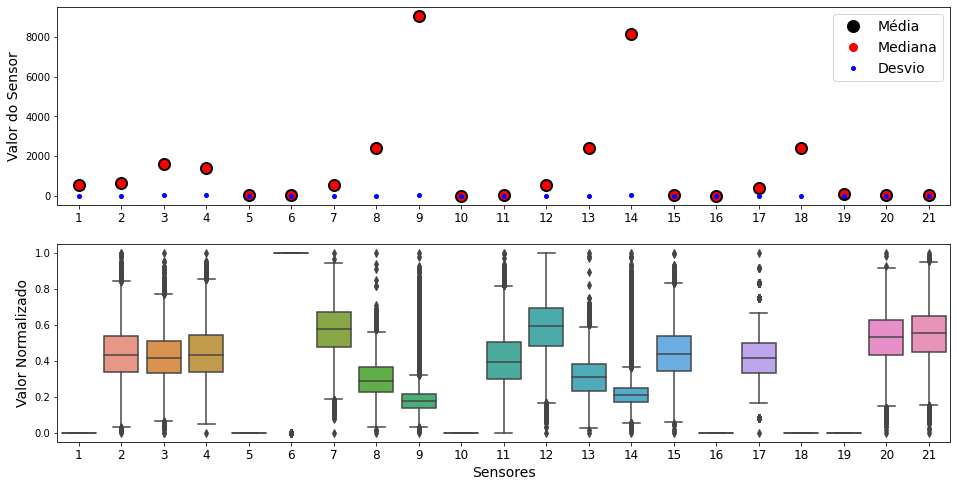

In [9]:
fig, axes = plt.subplots(2, 1,figsize = (16,8));
axes[0].plot(train_data[train_data.columns[1:-1].to_list()].mean(), "ok", linewidth= 3, markersize=12);
axes[0].plot(train_data[train_data.columns[1:-1].to_list()].median(), "or", linewidth= 3, markersize=8);
axes[0].plot(train_data[train_data.columns[1:-1].to_list()].std(), "ob", linewidth= 3, markersize=4);

axes[0].legend(["Média", "Mediana", "Desvio"], loc="upper right", fontsize=14);
axes[0].set_xticklabels(labels = range(1,22), fontsize = 12); 
axes[0].set_xlim(-0.5,20.5);
axes[0].set_ylabel("Valor do Sensor", fontsize=14);

sns.boxplot(ax = axes[1], x = "sensor", y = "sensor_value", data = new_data);
axes[1].set_xlim(-0.5,20.5);
axes[1].set_xlabel("Sensores", fontsize=14);
axes[1].set_ylabel("Valor Normalizado", fontsize=14);
axes[1].set_xticklabels(labels = range(1,22), fontsize = 12); 

### Densidade x Valor do Sensor

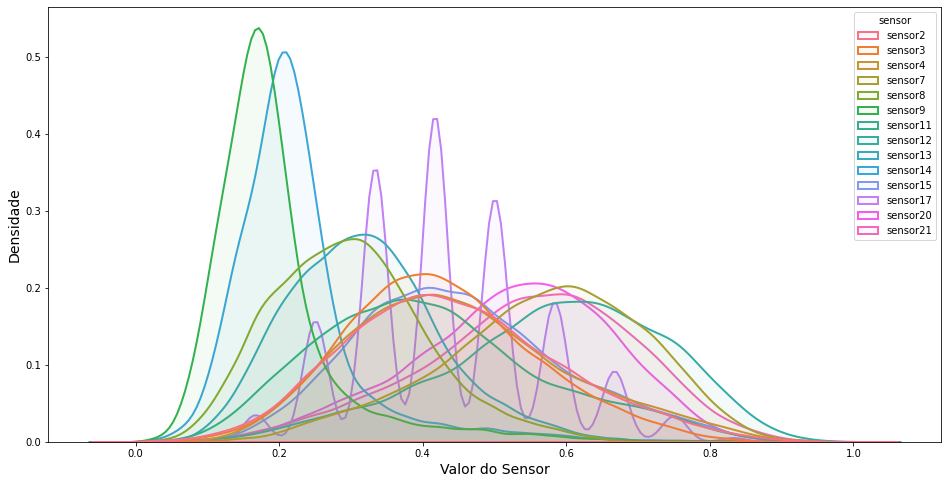

In [10]:
novar_col = ["sensor1","sensor5", "sensor6","sensor10","sensor16", "sensor18","sensor19"]
fig, axes = plt.subplots(1, 1,figsize = (16,8));
sns.kdeplot(ax=axes, data=new_data[~new_data.sensor.isin(novar_col)], x="sensor_value", hue="sensor",
            warn_singular=False, fill=True, alpha=0.05, linewidth=2);
axes.set_xlabel("Valor do Sensor", fontsize=14);
axes.set_ylabel("Densidade", fontsize=14);

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   sensor1   20631 non-null  float64
 2   sensor2   20631 non-null  float64
 3   sensor3   20631 non-null  float64
 4   sensor4   20631 non-null  float64
 5   sensor5   20631 non-null  float64
 6   sensor6   20631 non-null  float64
 7   sensor7   20631 non-null  float64
 8   sensor8   20631 non-null  float64
 9   sensor9   20631 non-null  float64
 10  sensor10  20631 non-null  float64
 11  sensor11  20631 non-null  float64
 12  sensor12  20631 non-null  float64
 13  sensor13  20631 non-null  float64
 14  sensor14  20631 non-null  float64
 15  sensor15  20631 non-null  float64
 16  sensor16  20631 non-null  float64
 17  sensor17  20631 non-null  int64  
 18  sensor18  20631 non-null  int64  
 19  sensor19  20631 non-null  float64
 20  sensor20  20631 non-null  fl

In [12]:
train_data.std()

id          2.922763e+01
sensor1     0.000000e+00
sensor2     5.000533e-01
sensor3     6.131150e+00
sensor4     9.000605e+00
sensor5     1.776400e-15
sensor6     1.388985e-03
sensor7     8.850923e-01
sensor8     7.098548e-02
sensor9     2.208288e+01
sensor10    0.000000e+00
sensor11    2.670874e-01
sensor12    7.375534e-01
sensor13    7.191892e-02
sensor14    1.907618e+01
sensor15    3.750504e-02
sensor16    1.387812e-17
sensor17    1.548763e+00
sensor18    0.000000e+00
sensor19    0.000000e+00
sensor20    1.807464e-01
sensor21    1.082509e-01
RUL         6.888099e+01
dtype: float64

## Limpeza dos dados

### Verificando sensores com valores de correlação NaN

In [13]:
print (train_data.corr()['RUL'])

id          0.078753
sensor1          NaN
sensor2    -0.606484
sensor3    -0.584520
sensor4    -0.678948
sensor5          NaN
sensor6    -0.128348
sensor7     0.657223
sensor8    -0.563968
sensor9    -0.390102
sensor10         NaN
sensor11   -0.696228
sensor12    0.671983
sensor13   -0.562569
sensor14   -0.306769
sensor15   -0.642667
sensor16         NaN
sensor17   -0.606154
sensor18         NaN
sensor19         NaN
sensor20    0.629428
sensor21    0.635662
RUL         1.000000
Name: RUL, dtype: float64


In [14]:
data_cor = corr_clean (train_data)

## Analisando a correlação

<AxesSubplot:>

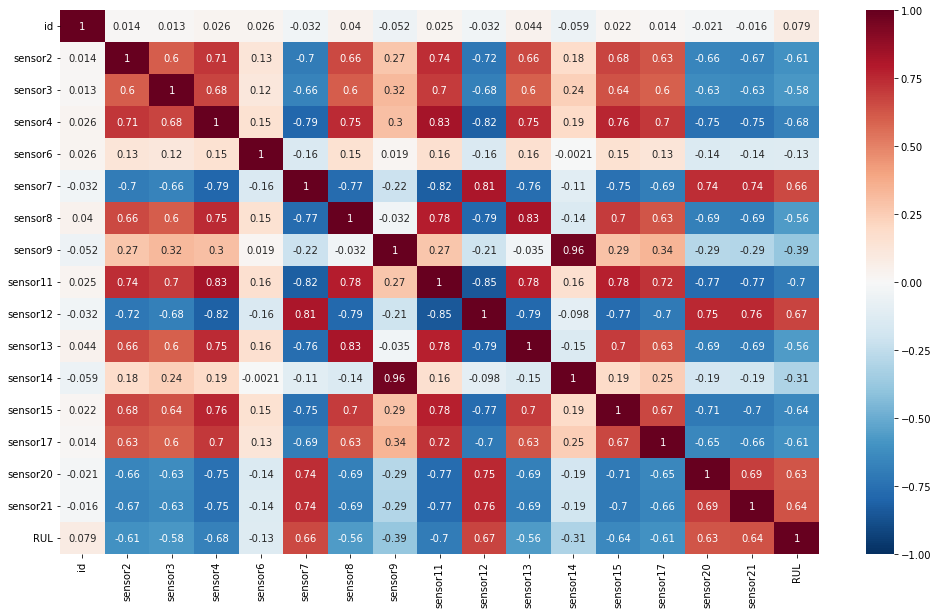

In [15]:
plt.figure(figsize=(17,10))
sns.heatmap(data_cor, cmap='RdBu_r', vmin=-1, vmax=1, annot=True)

In [16]:
data_cor.sort_values(by=['RUL'], ascending=False, key=abs).head(6)

,id,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,RUL
RUL,0.078753,-0.606484,-0.584520,-0.678948,-0.128348,0.657223,-0.563968,-0.390102,-0.696228,0.671983,-0.562569,-0.306769,-0.642667,-0.606154,0.629428,0.635662,1.000000
sensor11,0.024707,0.740020,0.695900,0.830136,0.160014,-0.822805,0.782213,0.274591,1.000000,-0.846884,0.780761,0.163408,0.780913,0.722296,-0.771510,-0.772554,-0.696228
sensor4,0.026116,0.714949,0.678413,1.000000,0.150480,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193,-0.678948
sensor12,-0.031882,-0.724578,-0.680307,-0.815591,-0.155884,0.812713,-0.786540,-0.210238,-0.846884,1.000000,-0.788441,-0.098141,-0.766052,-0.703485,0.751943,0.756263,0.671983
sensor7,-0.032073,-0.702136,-0.664595,-0.793130,-0.155720,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447,0.657223
sensor15,0.022486,0.675975,0.639921,0.758459,0.149042,-0.747051,0.700949,0.293753,0.780913,-0.766052,0.697662,0.193761,1.000000,0.669205,-0.707671,-0.704043,-0.642667


## Cálculo da Média Móvel

In [17]:
train_data = load_data()
train_data.head()

,id,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


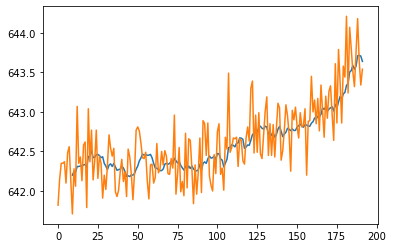

In [18]:
sensor2=train_data[train_data['id']==1]['sensor2']
sensor2_avg = sensor2.rolling(10).mean()

plt.plot(sensor2_avg)
plt.plot(sensor2)

In [19]:
def average_moving(data, step=25):   
    col = data.columns
    data_avg = pd.DataFrame(columns = data.columns)

    for i in range(1, 101):
        temp_data=data[data.id==i]
#         print(temp_data.shape)
        list_avg = []
        list_avg.append(temp_data['id'][step-1:])
        for sensor in col[1:-1]:
            list_avg.append(temp_data[sensor].rolling(step).mean()[step-1:])#
        list_avg.append(temp_data['RUL'][step-1:])#

        data_avg = pd.concat([data_avg,pd.DataFrame(list_avg).transpose()],ignore_index=True)
    return data_avg

In [20]:
data_avg = average_moving(train_data)

In [21]:
data_avg.head()

,id,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1.0,518.67,642.3516,1587.4404,1400.3644,14.62,21.61,554.0676,2388.0616,9049.9300,...,2388.0428,8132.5988,8.410400,0.03,391.92,2388.0,100.0,38.9736,23.385876,167.0
1,1.0,518.67,642.3652,1587.4156,1400.1832,14.62,21.61,554.0576,2388.0620,9049.9668,...,2388.0444,8132.3000,8.410660,0.03,392.00,2388.0,100.0,38.9656,23.385712,166.0
2,1.0,518.67,642.3768,1587.3616,1400.1312,14.62,21.61,554.0704,2388.0612,9050.1224,...,2388.0468,8132.4244,8.409572,0.03,392.04,2388.0,100.0,38.9652,23.386656,165.0
3,1.0,518.67,642.3768,1587.1556,1399.9284,14.62,21.61,554.0872,2388.0628,9049.9984,...,2388.0488,8132.1872,8.410152,0.03,392.04,2388.0,100.0,38.9676,23.384252,164.0
4,1.0,518.67,642.3592,1587.2372,1399.8932,14.62,21.61,554.0792,2388.0604,9050.0380,...,2388.0480,8132.1564,8.412180,0.03,392.08,2388.0,100.0,38.9696,23.383684,163.0


In [22]:
print (data_avg.corr()['RUL'])

id          0.089324
sensor1          NaN
sensor2    -0.716833
sensor3    -0.726354
sensor4    -0.719307
sensor5    -0.022242
sensor6    -0.375224
sensor7     0.696450
sensor8    -0.569600
sensor9    -0.379899
sensor10         NaN
sensor11   -0.713934
sensor12    0.694589
sensor13   -0.566740
sensor14   -0.290122
sensor15   -0.720414
sensor16   -0.010180
sensor17   -0.727551
sensor18         NaN
sensor19         NaN
sensor20    0.716542
sensor21    0.722367
RUL         1.000000
Name: RUL, dtype: float64


In [23]:
avg_data_cor = corr_clean (data_avg)

<AxesSubplot:>

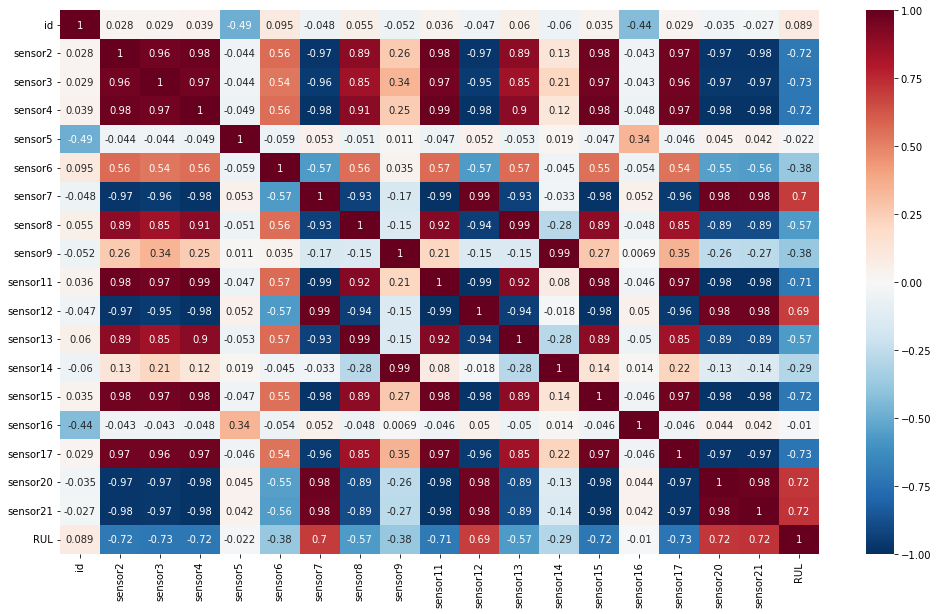

In [24]:
plt.figure(figsize=(17,10))
sns.heatmap(avg_data_cor, cmap='RdBu_r', vmin=-1, vmax=1, annot=True)

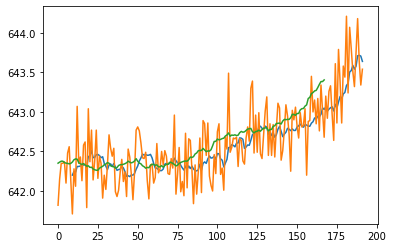

In [25]:
sensor2=train_data[train_data['id']==1]['sensor2']
sensor2_avg = sensor2.rolling(10).mean()

plt.plot(sensor2_avg)
plt.plot(sensor2)
plt.plot(data_avg[data_avg['id']==1]['sensor2'])

In [26]:
#print(np.sum(sensor2_avg-train_data[train_data['id']==1]['sensor2'].to_list()))